# 개요

- 데이터 분석 기법으로 시각화 통한 분석및 설명
  - 때로는, 숫자보다 차트등이 더 강력하게 어떤 내용을 설명할수 있다
- 라이브러리
  - matplotlib (기본형)
  - seaborn (6개 차트를 좀더 고급, 사용편하게 구성)
  - **기타 (사용할때 내용 추가)**
    - 인터렉티브 라이브버리
    - 웹으로 마이그레이션 되는 라이브러리
  - javascript (웹 환경)
    - d3.js (정보 시각화, 동적, 인터렉티브)
    - chart.js
    - 기타,...

- 핵심
  - **어떤 데이터를, 어떤 주장을 표현하고 설명하고 납득시킬때 어떤 차트가 가장 효과적인가!!**

In [1]:
import numpy as np
import pandas as pd

# matplotlib

- https://matplotlib.org/

In [3]:
from matplotlib import pyplot as plt

# 차트를 주피터 노트북에 삽입하는 매직코드(코랩은 생략가능)
%matplotlib inline
# 코랩은 차트에 한글이 깨진다 => 폰트가 없다 => 폰트를 설치후 사용가능(매번 인스턴스 생성할때마다 반복)

In [5]:
# 만약 폰트를 적용한다면(설치가 되었다는 전제하에)
import matplotlib

# 운영체계별로 분기처리 가능함(맥, 윈도우, 리눅스)
# matplotlib.rc('font', family='설치된 폰트이름')

- 차트를 그리기 위해서 기본 준비사항
  - 데이터
    - x (가로축. 통상 오른쪽으로 가면 값이 증가)
    - y (세로축, 통상 위로가면 값이 증가)
    - x와 y간에는 어떤 관계가 있을것이다 => 차트로 표현한것

In [11]:
# 시각화 준비
# 1. 데이터 준비
x = np.arange( 0, 12, 0.01 )
print( x.shape )

# x와 y 관계는 삼각함수 sin()으로 설명할수 있다 => 임의의 값을 부여하면 y를 예측할수 있다
y = np.sin(x)

(1200,)


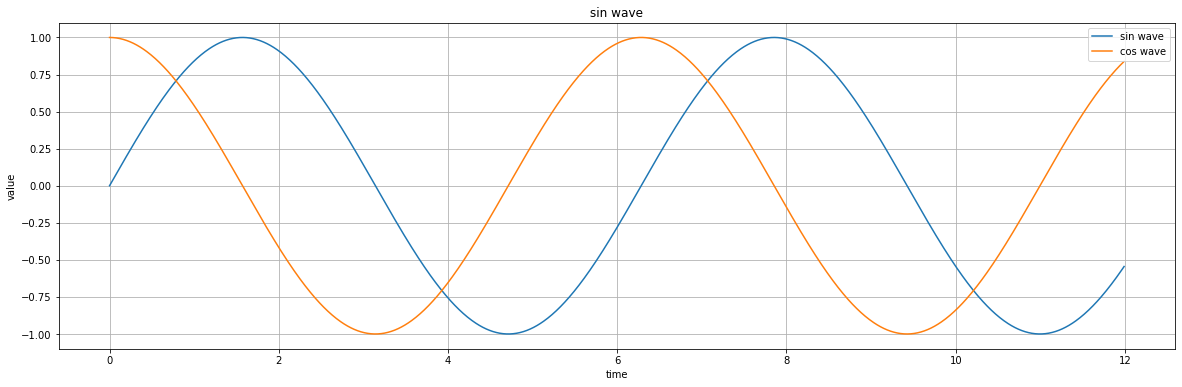

In [16]:
# 2. 시각화 - 선형(linear)차트 그리기
# 2-1. 형태 정의 (모양)
plt.figure( figsize=(20, 6) ) # 모양을 그려보면서 체크, 데이터를 검토후 체크

# 2-2. plotting 처리 (그린다) -> 생략하면 무의미하다
# plt.xxx() 통해서 다양한 차트를 그린다
# pandas에도 빌트인 되어 있음 => ( kind='bar' ) => 1개의 함수로 모두 그리고, 인자로 종류를 처리
# pandas에서 직접 시각화 하는것은 차후에 등장
# 데이터 표현을 2종류 이상 시각화 하면 라벨 추가 => 범례
plt.plot( x, y,  label='sin wave')
plt.plot( x, np.cos(x), label='cos wave' )  # 한개의 차트폼에 2개의 데이터 관계성을 설명한것 -> 자동으로 다른색상 표현

# 2-3. deco 처리 (꾸민다)
plt.legend() # 최적 위치로 알아서 세팅 => 반드시 써야 범례가 등장
# 격차 무늬 추가 => 원한다면 직접 n차함수 형태로 그리는게 적합 => 머신러닝, 예측범위 시각화할대 사용
plt.grid()
plt.xlabel('time')  # x축의 이름
plt.ylabel('value') # y축의 이름
plt.title(' sin wave ') # 제목

# 2-4. 화면에 출력 ( 내보낸다 혹은 저장한다 )
plt.show() # 화면에 보여라

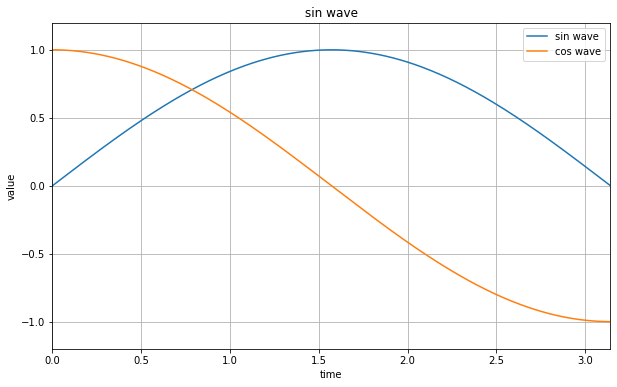

In [19]:
plt.figure( figsize=(10, 6) )

plt.plot( x, y,  label='sin wave')
plt.plot( x, np.cos(x), label='cos wave' )

plt.legend()
plt.grid()
plt.xlabel('time')
plt.ylabel('value')
plt.title(' sin wave ')

# 차트상에 중요 부분만 발췌해서 집중적으로 표현=> 밀집된 지역 표현
# 값의 범위를 제한함으로써 해당 부분만 강조하여 시각화
plt.xlim( 0, np.pi )
plt.ylim( -1 - 0.2, 1 + 0.2 )

plt.show()

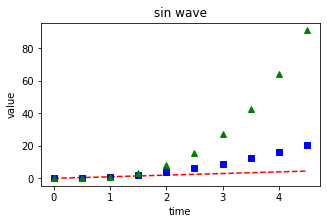

In [22]:
x = np.arange( 0, 5, 0.5 )

plt.figure( figsize=(5, 3) )

# 선의 모양, 색상을 단축 표현으로 묘사
plt.plot( x, x, 'r--')
plt.plot( x, x**2, 'bs')
plt.plot( x, x**3, 'g^')

plt.xlabel('time')
plt.ylabel('value')
plt.title(' sin wave ')

plt.show()

- 바차트, 파이차트, 등등 다양한차트들 별도 자료 제공

# seaborn

- https://seaborn.pydata.org/
- 6개의 중점 차트를 지원한다 (하이레벨 API 형태로 -> 쉽게 사용 가능하도록 제공한다)

In [23]:
import seaborn as sns

In [24]:
# 전체 스타일 지정
sns.set_style('darkgrid')

## tips 데이터를 이용한 시각화

In [25]:
# 데이터 -> seaborn 연습용 데이터 활용
# https://github.com/mwaskom/seaborn-data 
# 수십개의 연습용 실 데이터르 csv로 형태로 제공 'tips.csv' => 'tips'
tips = sns.load_dataset('tips')
tips.head()
# 탐색적 분석 (볼륨, 컬럼, 결측, 데이터 특성,...)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# 기초 점검
tips.shape # 데이터가 적어서, 어떤 분석을 해도 신뢰성이 부족할듟, 연습용

(244, 7)

In [27]:
tips.describe()
# 기초 통계량을 통해 기본적인 정보를 분석할수 있다

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [28]:
tips.info()
# category => 범주형 변수로 집계 및 피벗을 통한 데이터 준비및 분석이 가능할것으로 추론됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


- 예상 분석 결론
  - 담배를 피는 고객이 더 많은 팁을 주는가?
  - 주말에는 금연자석을 늘려야 하나? 흡연자석을 늘여야 하나?
  - 서빙 관전에서는 어떤 고객을 공략해야 팁을 더 많이 받지?

In [29]:
tips.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

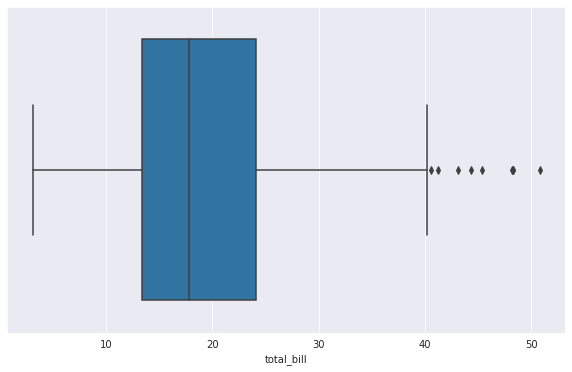

In [30]:
# boxplot 시각화
# 모양 
plt.figure( figsize=(10,6) )
# 그리기 
sns.boxplot( x=tips.total_bill ) # y 없이 그렸음
# 꾸미기(생략)
# 화면보이기
plt.show()

# 해석
# 고객들의 총 지불 데이터중 중간값 17.xx 로 보인다
# 최대 고객은 51~52 정도 지불햇는데, 전체적으로 40불이상은 고객은 드물다
# 고객 밀도를 보면 14 ~ 23 정도 사이에 대부분 고객이 몰려있다 
# -> 메뉴의 세부 가격을 모르니, 세트가를 이 지점에 배치하면 매출이 높아지지 않을까

In [31]:
# 요일별로 매출 시각화
# x축 : 요일, y축 : 매출
# 컬럼명 확인
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [32]:
tips.day.unique() # 이 레소토랑은 어떤 요일에 영업하는지, 주 몇일 영업
# 목, 금, 토, 일 영업

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

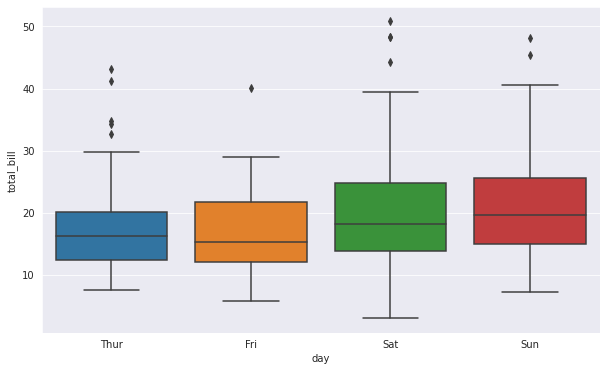

In [35]:
plt.figure( figsize=(10,6) )
#sns.boxplot( x=tips.day, y=tips.total_bill ) 
sns.boxplot( x='day', y='total_bill', data=tips ) 
plt.show()
# 해석
# 총매출의 최소 매출과 최대매출이 전부 토요일날 발생
# 중간값 기준 일요일 최대매출
# 주말 매출이 평일보다 높아 보인다
# 목요일이 금요일보 더 매출이 높아보이는데, 그 질에 대한 분석을 별도로 필요해보인다

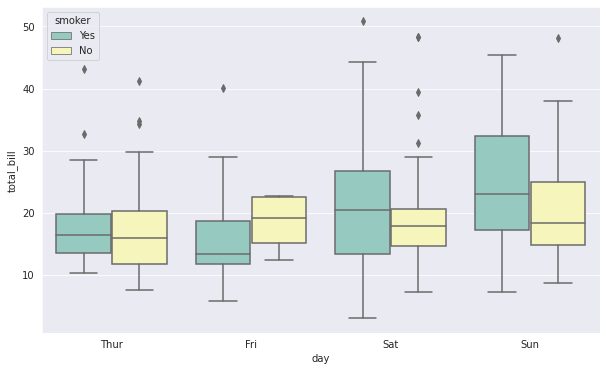

In [38]:
# 세번재 요인을 추가한다 x, y + hue
# 흡연 요인 추가
plt.figure( figsize=(10,6) )
# palette='Set3' 색상 변경
sns.boxplot( x='day', y='total_bill', hue='smoker', data=tips, palette='Set3' ) 
plt.show()
# 주말에는 흡연자 매출이 높다, 그 숫자를 체크하진 못했다
# 주말에는 흡연석을 늘리는게 유리, 마케팅도 강화

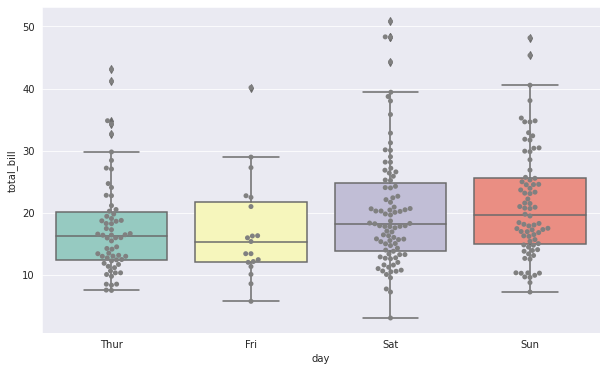

In [42]:
# 실질적인 데이터 포인트를 찍어본다 => 밀도 성분을 표현
plt.figure( figsize=(10,6) )
sns.boxplot( x='day', y='total_bill', data=tips, palette='Set3' ) 
sns.swarmplot( x='day', y='total_bill', data=tips, color='0.5')
plt.show()
# 금요일은 소수의 나름 큰손(총양은 체크해봐야함)이 와서 매출을 발생
# 금요일은 손님이 적다 => 금요일날 손님의 수를 늘리기 위한 전략 필요해 보임
# 최고 매출/최소 매출이 전부 토요일에 몰려있다 => 최소 매출/최대 매출이 디너? 런치?

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

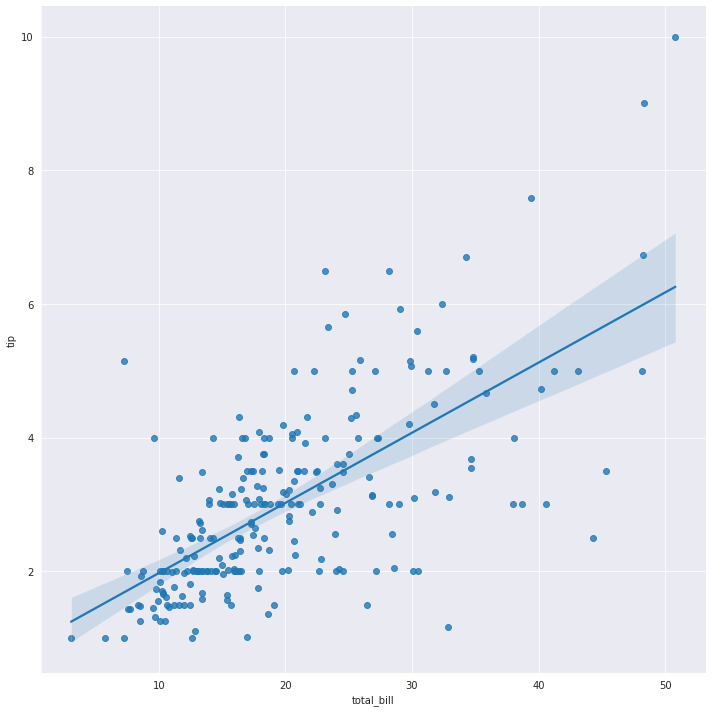

In [47]:
# 산점도 or 산포도 => 데이터 분포도 표현 => ..... 회귀와 연계된다 
# => x와 y간의 관게를 표현하는 방정식을 추론할수 있다
plt.figure( figsize=(10,5) )
# 매출과 팁가의 관계(방정식)을 체크해 보고 싶다
# size 차트 크기
sns.lmplot( x='total_bill', y='tip', data=tips, size=10 )
plt.show()

# 대각선으로 보이는 1차함수선 매출대비 팁에 대한 평균선
# 각 데이터 포인트(관측값)는 평균선과 떨어져 있다 (이 거리를 오차값 , 양수, 음수 )
# 이 오차값을 제곱한다 혹은 절대값 취한다 => 양수가 된다 
# => .... => 분산, 표준편차 => 데이터가 얼마나 떨어져 있는지 판단

# 회귀 관점에서는 대각선으로 보이는 1차함수가 가장 이상적인 매출대비 팁으로 판단된다
# 대각선 주위로 영역이 보인다 -> 오차범위 (여지를 둔다)
# 매출 18불 팁이 2.8~9 기대된다(예측된다)

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


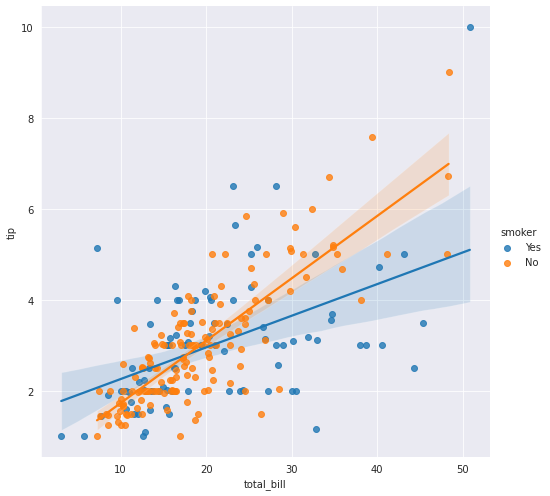

In [48]:
sns.lmplot( x='total_bill', y='tip', hue='smoker', data=tips, size=7 )
plt.show()

# 19불을 기점으로 그 이상 매출에서는 금연자의 팁 기대값이 흡연자보다 더 크다
# 반대 상황에서는 흠엽자가 더 팁을 자 준다

## flights 데이터를 이용한 시각화

In [49]:
# 항공사가 년/월별 단위 운송한 고객수 데이터
flights = sns.load_dataset('flights')
flights.shape

(144, 3)

In [50]:
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


In [51]:
# 12년치 데이터
flights.year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

In [52]:
# 월 12개
flights.month.unique()

# 총 데이터량은 12*12 => 144

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

In [53]:
# 히트맵 시각화
# 밀도를 통해 데이터의 밀집도를 표현 => 어느쪽에 몰려있는가?
# 인덱스 : 월, 컬럼 :년도, 데이터 : 고객수 => df를 만드시오 (12,12)
#
flights_df = flights.pivot('month', 'year', 'passengers')
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


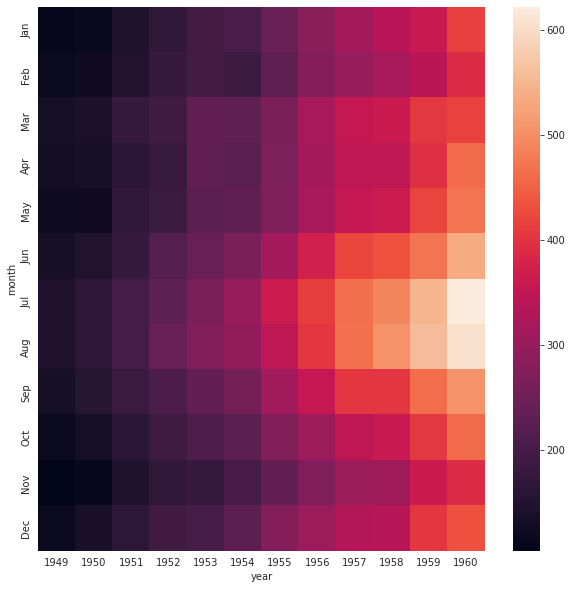

In [54]:
plt.figure( figsize=(10,10) )
sns.heatmap( flights_df)
plt.show()
# 색이 밝아질수록 고객수가 많아진다 -> 칼라바
# 년도를 갱신할수록 고객수는 계속 증가
# 여름에 고객수가 가장 많다 => 여름 휴가 영향!! <-> 추워질수록 고객수가 줄어든다
# 이 항공사는 북반구에 위치한다는 전제(가정)

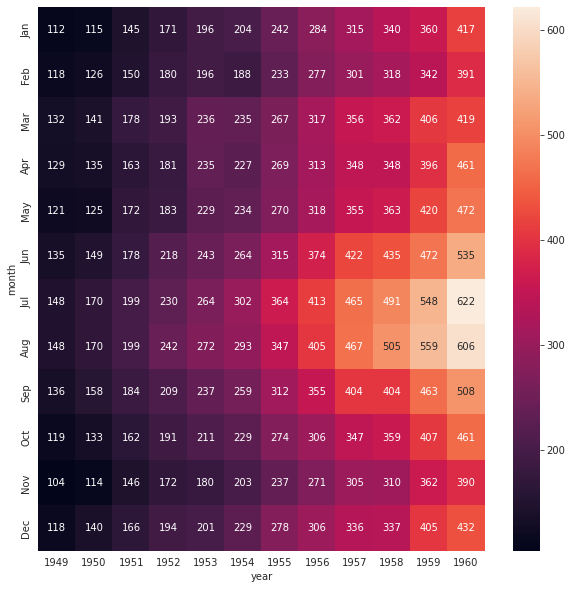

In [58]:
# 각 밀도 위에 수치를 표현
plt.figure( figsize=(10,10) )
# fmt : 포멧
# annot : 밀도 위 영역에 값을 출력
sns.heatmap( flights_df, annot=True, fmt='d'  )
plt.show()

## iris 데이터 (붓꽃, ML/DL 학습용 데이터)

In [59]:
iris = sns.load_dataset( 'iris' )
iris.shape

(150, 5)

In [60]:
iris.head(2)
# 꽃잎, 꽃받침의 너비, 길이 => species(붓꽃의 종류를 설정된다)
# 4개의 특성을 알면 -> 붓꽃의 종류를 예측할수 있다
# 4개의 특성 : 독립변수, 특징 -> 붓꽃의 종류 : 종속변수, 정답

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


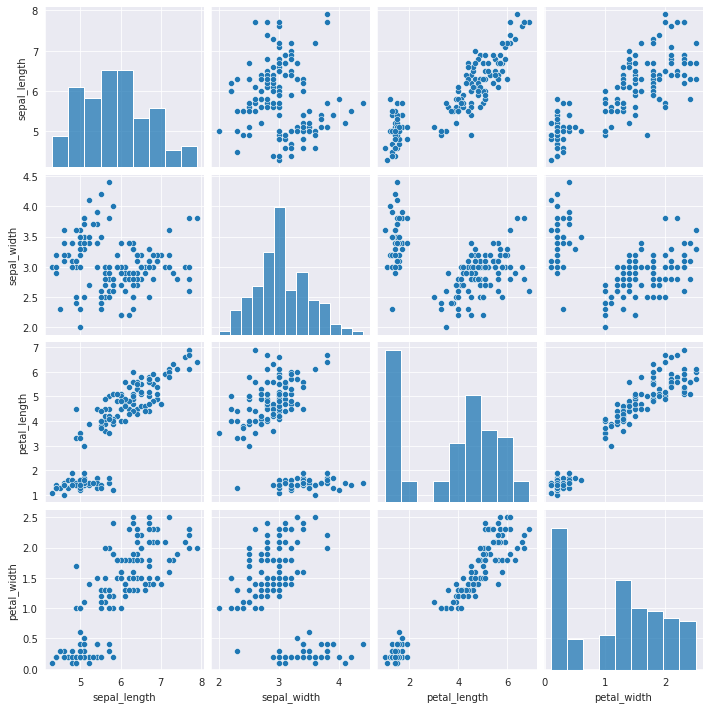

In [61]:
# 산포행렬 (대각성을 대칭적으로 하여 각 특성끼지 x,y를 지정하여 데이타 포인터 출력)
sns.pairplot( iris )
plt.show()


In [62]:
# iris의 정답(종)의 모든 종류는 -> 범주형
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

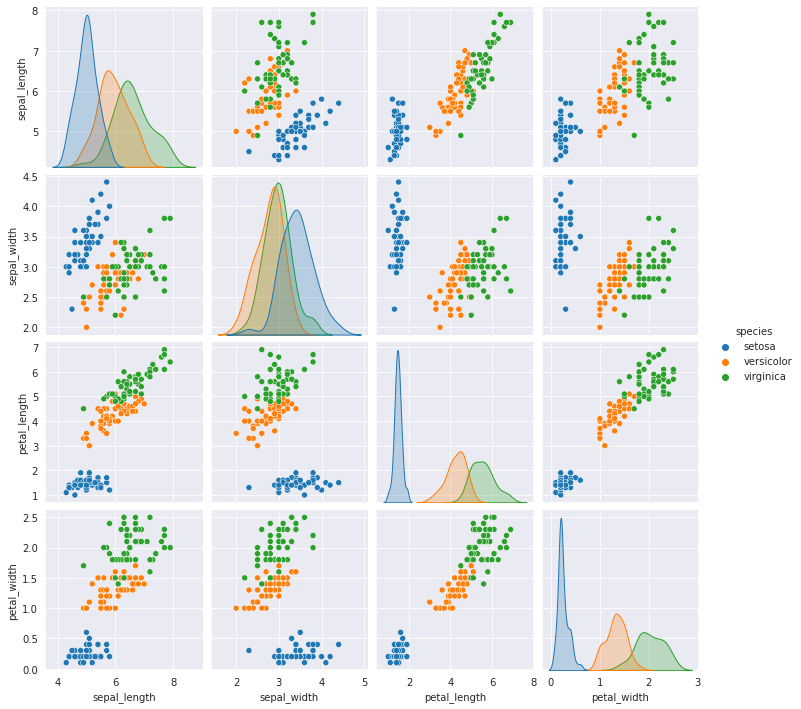

In [63]:
# 위의 차트는 점이 찍히는것만 확인, 구분을 못함(종을)
sns.pairplot( iris, hue='species' )
plt.show()
# 종속변수(정답)을 hue로 지정하여 구분이 잘되는 컬럼 과 않되는 컬럼을 구분해 낸다

In [64]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

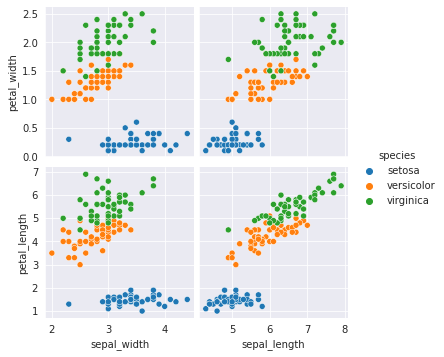

In [65]:
# 특정 컬럼만 산포행렬의  x축, y축에 설정
sns.pairplot( iris, hue='species', x_vars=['sepal_width', 'sepal_length'],  y_vars=['petal_width', 'petal_length'])
plt.show()

# Series/DataFrame에서 시각화

- 기본 차트

In [67]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [77]:
# 집계 -> 종기준(species) -> 각 변수(컬럼)들의 평균값을 구하시오
iris_species_mean = iris.groupby('species').mean()
iris_species_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Text(0.5, 1.0, 'sepal_length per species values')

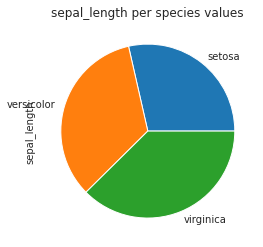

In [78]:
# sepal_length 기준으로 각 종별 값들의 크기 비교를 시각화 하시오
# 바차트, 파이차트
iris_species_mean['sepal_length'].plot( kind='pie', fontsize=10 )
# 파라미터 조정으로 꾸미기 진행 가능, 없다면 plt에서 해결
plt.title('sepal_length per species values')
# 속성명 노출되는 부분은 차후 체크

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60da117dc0>,
      dtype=object)

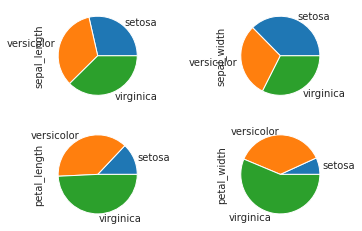

In [79]:
# 특성 4개 전체를 각각 기준으로 한개의 차트에서 (2,2)로 분할하여 시각화 하시오 => df
iris_species_mean.plot( kind='pie', subplots=True, layout=(2,2), legend=False )

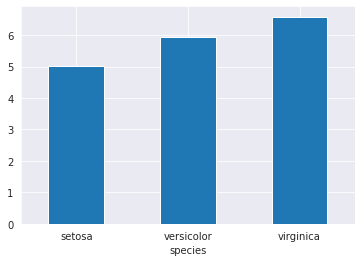

In [85]:
# 변수가 많아지거나, 비중이 앞도적으로 높은 성향을 가진 데이터가 존재하다면 => 표현을 극대화
# rot=45  : 45도로 x값의 항목을 기울인다
iris_species_mean['sepal_length'].plot( kind='bar', fontsize=10, rot=0 )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f60dc421f70>,
      dtype=object)

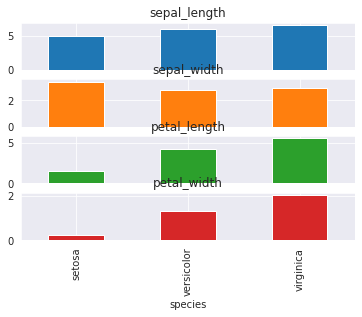

In [86]:
iris_species_mean.plot( kind='bar', subplots=True, legend=False )
# 꾸미기 작업이 좀더 필요하다

In [ ]:
# 히스토그램
# 데이터들의 겹침을 표현할수 있다 => 분포 표현

In [87]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


Text(0.5, 0.98, 'iris histogram')

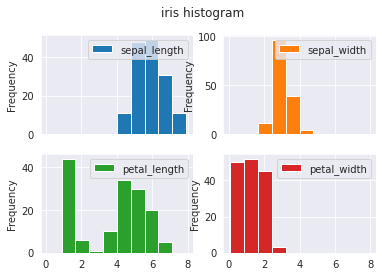

In [88]:
iris.plot( kind='hist', subplots = True, layout=(2,2) )
plt.suptitle('iris histogram')
# 각 특성별로 값의 분포를 확인했다 -> 종을 개입시켜서 특성기준에서 각 종별로 어떤 분포를 가지는지

In [89]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [92]:
# iris 데이터는 총 150개, 각 종별로 50개씩 데이터가 제공된다
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

setosa (50, 5)
versicolor (50, 5)
virginica (50, 5)


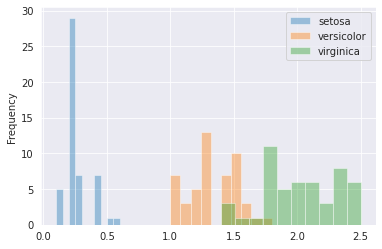

In [93]:
for spec in iris.species.unique():  
  # 같은 종 데이터만 추출
  spec_df = iris[ iris.species == spec ]
  print( spec, spec_df.shape )
  # 특성중 1개를 지정하여 해당 데이터를 시각화 => petal_width
  spec_df[ 'petal_width' ].plot( kind='hist', alpha=0.4, label=spec)

plt.legend()
plt.show()

# 해석
# iris 데이터중 petal_width 특성을 살펴보면
# setosa 종은 완벽하게 다른종과 구분이 된다(데이터 분포 영역이 다르다)
# versicolor종과 virginica종은 일정부분 겹치는 영역이 있어서, 다른 변수들과 비교를 통해서 분리해 내야한다
# 대체적으로는 구분이 가능하다

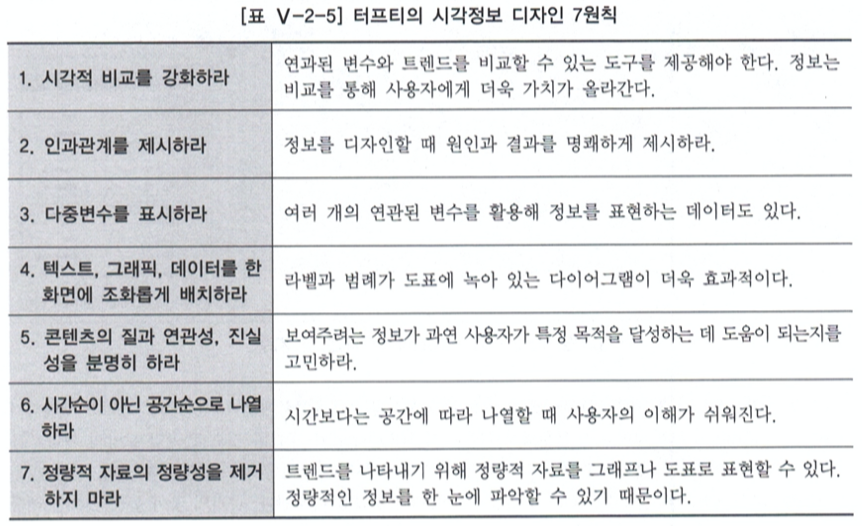

In [94]:
from IPython.display import Image
Image('/content/시각화원칙.png')

# 지도시각화(스타벅스 예제 처리)